# Wine Time: An Exploration of Wine Points and Prices
## Stats 131 Final Project: Mrinalini Garg, Parker Mansfield, Priyanka Nanayakkara
#### Slides: https://docs.google.com/presentation/d/1mFoejZHIjlbxEG7EEceNSiZVC-jls7bDCBr4MKtQs60/edit?usp=sharing
#### Video Presentation: https://www.youtube.com/watch?v=Lw4tmtEWeoM&feature=youtu.be

# Background

## a
This dataset was created by Zach Thoutt, a fullstack engineer from Boulder, CO: https://www.kaggle.com/zynicide. His dataset was created with the intention of creating a predictive model to identify wines based upon each wines disinct features similarly to the way a sommelier would identify a wine in a blind tasting. The dataset contains 129971 observations and 13 variables, with wines from 44 countries created between 1980 and 2017


## b/c
Zach noted that to create this dataset he used a webscraping tool to retrieve data from WineMag.com during the week of June 15th, 2017. 

## d
Implications this method of data collection could have on analysis: As we only have wines from the last 37 years, older styles of wine will not be considered in the analysis. In addition, there could be some issues with only sampling wines from WineMag.com as we don't know methodology for adding wines to the website looks like


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/arnavkumar/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
df = pd.read_csv('winemag.csv')

In [8]:
import re
    
df["year"]= np.nan

In [9]:
for i in range(0,129971):
    if len(re.findall(r'\d\d\d\d', df['title'][i]))==0:
        df.loc[i,'year']=np.nan
    else:
        df.loc[i,'year']= int(min(re.findall(r'\d\d\d\d', df['title'][i])))
        

In [10]:
#oldest wine is 1980. All other years in titles were weird brand names
# Combining all years below 1997 
df.loc[ df['year']< 1997,'year']= 1996

#exported as wine.csv

# Exploratory


In [11]:
#df= pd.read_csv('/Users/parkermansfield/Desktop/Senior/Spring/Stats131/Final Project/wine.csv')


### Exploring Price
The histogram below of wine prices gives a sense of the typical price range represented in the dataset.

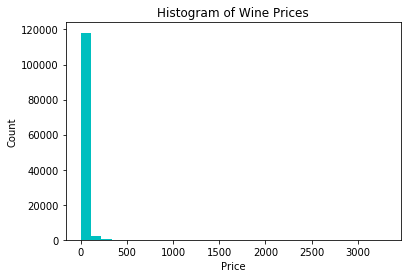

In [12]:
price = df.loc[df['price'].isnull()==False]
plt.hist(price['price'], bins=30, color='c')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Wine Prices')
plt.show()

The maximum value of price in the dataset is 3300, which is an outlier. Additionally, 75% of the price values are less than 42. Therefore, we will change the maximum x limit of the plot to a lower value to see the distribution better. From this plot, it's clear that mid-range wines are most popular.

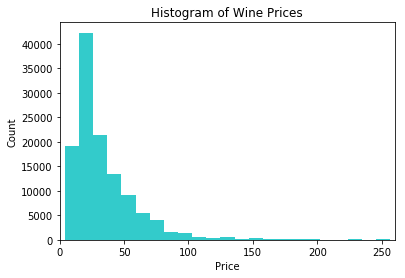

In [13]:
plt.hist(price['price'], bins=300, color ='c', alpha = .8)
plt.xlim([0,260])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Wine Prices')
plt.show()

Furthermore, the mean price of wine is \$35.36 dollars. The median price is \$25. 

In [14]:
print(price.price.mean())
print(price.price.median())

35.363389129985535
25.0


The plot below shows the mean price as the dotted red line, while the median price is the dotted black line. The distribution is right skewed.

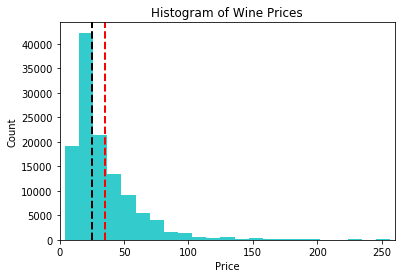

In [15]:
plt.hist(price['price'], bins=300, color ='c', alpha = .8)
plt.xlim([0,260])
plt.axvline(price['price'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(price['price'].median(), color='k', linestyle='dashed', linewidth=2)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Wine Prices')
plt.show()

### Exploring Points
The histogram below shows the distribution of points given to wines. It is normally distributed.

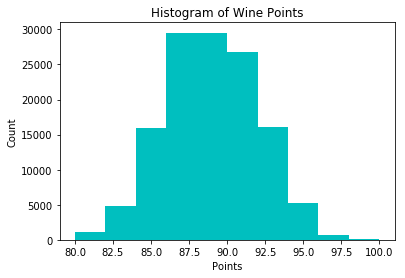

In [16]:
points = df.loc[df['points'].isnull()==False]
plt.hist(np.array(points.points), color='c')
plt.xlabel('Points')
plt.ylabel('Count')
plt.title('Histogram of Wine Points')
plt.show()

The mean point value for wines is 88.45 and the median value is 88. It is also interesting to note that the minimum point value is 80 and the maximum is 100. The histogram below shows the point distribution with a red line showing the mean and a black line showing the median.

In [17]:
print(points.points.mean())
print(points.points.median())
print(points.points.std())

88.44713820775404
88.0
3.0397302029162336


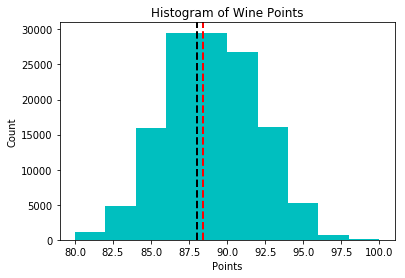

In [18]:
plt.hist(np.array(points.points), color='c')
plt.axvline(points['points'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(points['points'].median(), color='k', linestyle='dashed', linewidth=2)
plt.xlabel('Points')
plt.ylabel('Count')
plt.title('Histogram of Wine Points')
plt.show()

### Relationship Between Price and Points

From the graph below, we can see that as price increases, you are more likely to get a wine with a higher point value. However, it is possible to get a very highly rated wine that does not cost a lot, and it is possible to get an expensive wine that does not have a very high point rating.

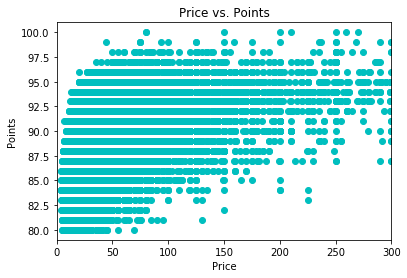

In [19]:
price_points = df.loc[df['points'].isnull()==False]
price_points = df.loc[df['price'].isnull()==False]

plt.scatter(price_points.price,price_points.points, color='c')
plt.xlabel('Price')
plt.ylabel('Points')
plt.xlim([0,300])
plt.title('Price vs. Points')
plt.show()

In [20]:
price_points

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011.0
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013.0
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012.0
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2013.0
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012.0
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2011.0


### Country Specific Exploration
Now we can look at the countries with the highest point ratings, on average.

In [21]:
by_country=pd.DataFrame(pd.pivot_table(price_points[['price','points','country']],columns='country',aggfunc=('mean','median','count')).T)
by_country['country'] = by_country.index
by_country = by_country.reset_index(drop=True)
by_country.columns = ['points_count','points_mean','points_median','price_count','price_mean','price_median','country']
by_country.head() # not sorted

,points_count,points_mean,points_median,price_count,price_mean,price_median,country
0,3756.0,86.710330,87.0,3756.0,24.510117,17.0,Argentina
1,2.0,87.500000,87.5,2.0,14.500000,14.5,Armenia
2,2294.0,88.595466,89.0,2294.0,35.437663,21.0,Australia
3,2799.0,90.190782,90.0,2799.0,30.762772,25.0,Austria
4,2.0,86.500000,86.5,2.0,12.500000,12.5,Bosnia and Herzegovina


Below are the countries with the highest average point scores. The top country is India, followed by Austria and Germany. The count columns show how many wines were included in the average for a given country, and are useful for determining which country averages to not take as seriously because of lack of representation in the dataset.

In [22]:
top_points = pd.DataFrame(by_country.sort_values('points_mean',ascending=False)[1:10])
top_points.reset_index(drop=True)

,points_count,points_mean,points_median,price_count,price_mean,price_median,country
0,9.0,90.222222,90.0,9.0,13.333333,12.0,India
1,2799.0,90.190782,90.0,2799.0,30.762772,25.0,Austria
2,2120.0,89.836321,90.0,2120.0,42.257547,26.0,Germany
3,254.0,89.377953,90.0,254.0,35.712598,30.0,Canada
4,145.0,89.165517,89.0,145.0,40.648276,25.0,Hungary
5,1.0,89.000000,89.0,1.0,18.000000,18.0,China
6,17776.0,88.734867,88.0,17776.0,41.139120,25.0,France
7,6.0,88.666667,88.5,6.0,23.333333,23.0,Luxembourg
8,16914.0,88.618186,88.0,16914.0,39.663770,28.0,Italy


Countries with the highest median points are India, Germany, and Austria.

In [23]:
top_points_median = by_country.sort_values('points_median',ascending=False)[1:10]
top_points_median.reset_index(drop=True)

,points_count,points_mean,points_median,price_count,price_mean,price_median,country
0,9.0,90.222222,90.0,9.0,13.333333,12.0,India
1,2120.0,89.836321,90.0,2120.0,42.257547,26.0,Germany
2,2799.0,90.190782,90.0,2799.0,30.762772,25.0,Austria
3,254.0,89.377953,90.0,254.0,35.712598,30.0,Canada
4,7.0,88.571429,89.0,7.0,85.285714,38.0,Switzerland
5,489.0,88.496933,89.0,489.0,31.768916,25.0,Israel
6,145.0,89.165517,89.0,145.0,40.648276,25.0,Hungary
7,1.0,89.000000,89.0,1.0,18.000000,18.0,China
8,141.0,87.936170,89.0,141.0,14.645390,13.0,Bulgaria


In this dataset, France, Italy, and Spain are where the most wines come from.

In [24]:
most_wines = by_country.sort_values('points_count',ascending=False)[1:10]
most_wines.reset_index(drop=True)

,points_count,points_mean,points_median,price_count,price_mean,price_median,country
0,17776.0,88.734867,88.0,17776.0,41.139120,25.0,France
1,16914.0,88.618186,88.0,16914.0,39.663770,28.0,Italy
2,6573.0,87.290735,87.0,6573.0,28.215275,18.0,Spain
3,4875.0,88.316718,88.0,4875.0,26.218256,16.0,Portugal
4,4416.0,86.495471,86.0,4416.0,20.786458,15.0,Chile
5,3756.0,86.710330,87.0,3756.0,24.510117,17.0,Argentina
6,2799.0,90.190782,90.0,2799.0,30.762772,25.0,Austria
7,2294.0,88.595466,89.0,2294.0,35.437663,21.0,Australia
8,2120.0,89.836321,90.0,2120.0,42.257547,26.0,Germany


Below we can visualize the average point scores of the top scoring countries.

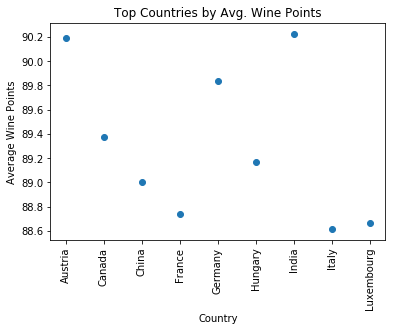

In [27]:
plt.scatter(x=top_points.country,y=top_points.points_mean)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Wine Points')
plt.title('Top Countries by Avg. Wine Points')
plt.show()

Now we can plot the average points of the top countries as well as the average corresponding prices. While points are relatively similar, price points vary.

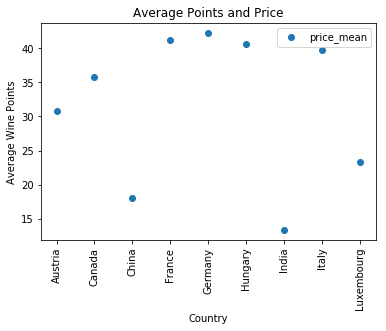

In [26]:
plt.scatter(x=pd.Series(top_points.country),y=pd.Series(top_points.price_mean))
#plt.scatter(top_points.country,top_points.price)
plt.xlabel('Country')
plt.ylabel('Average Wine Points')
plt.title('Average Points and Price')
plt.xticks(rotation=90)
plt.legend()
plt.show()

There are 708 varieties of wine in the dataset. The varieties with the highest average point score are shown below. The top variety by average points is Tinta del Pais, with average points of 95. It is interesting to note among the top varities, the prices vary.

### Explories Wineries
We can look for the most popular wineries.

In [28]:
by_winery=pd.DataFrame(pd.pivot_table(price_points[['price','points','winery']],columns='winery',aggfunc=('mean','median','count')).T)
by_winery['winery'] = by_winery.index
by_winery = by_winery.reset_index(drop=True)
by_winery.columns = ['points_count','points_mean','points_median','price_count','price_mean','price_median','winery']
by_winery.head() # not sorted

,points_count,points_mean,points_median,price_count,price_mean,price_median,winery
0,6.0,86.666667,87.0,6.0,18.333333,19.0,1+1=3
1,4.0,83.250000,83.5,4.0,24.750000,21.5,10 Knots
2,3.0,86.333333,86.0,3.0,18.000000,18.0,100 Percent Wine
3,2.0,90.500000,90.5,2.0,19.000000,19.0,1000 Stories
4,1.0,88.000000,88.0,1.0,25.000000,25.0,1070 Green


The top wineries by median point values are Clos de Tart and Château Cheval Blanc. However, these wineries only have a few wines in the dataset. So, we can consider Salon and Tenuta dell'Ornellaia as the top wineries by median point value because they have at least 5 wines in the dataset.

In [29]:
top_points_winery = by_winery.sort_values('points_mean',ascending=False)[1:15]
top_points_winery.reset_index(drop=True)

,points_count,points_mean,points_median,price_count,price_mean,price_median,winery
0,1.0,98.000000,98.0,1.0,319.000000,319.0,Clos de Tart
1,3.0,97.000000,96.0,3.0,825.000000,500.0,Château Cheval Blanc
2,1.0,97.000000,97.0,1.0,800.000000,800.0,Château d'Yquem
3,1.0,97.000000,97.0,1.0,195.000000,195.0,Ovid
4,1.0,97.000000,97.0,1.0,125.000000,125.0,J.L. Chave
5,1.0,97.000000,97.0,1.0,190.000000,190.0,Gandona
6,1.0,97.000000,97.0,1.0,285.000000,285.0,Château Angélus
7,5.0,96.800000,97.0,5.0,380.600000,350.0,Salon
8,10.0,96.700000,97.0,10.0,286.500000,232.5,Tenuta dell'Ornellaia
9,2.0,96.500000,96.5,2.0,2250.000000,2250.0,Château Pétrus


### Exploring Varieties

The varities with the highest average point ratings are shown in the table below.

In [30]:
print(len(df['variety'].unique())) # how many unique wine varities in dataset
variety = df.loc[df['points'].isnull()==False]
variety = df.loc[df['price'].isnull()==False]
variety = df.loc[df['variety'].isnull()==False]
by_variety = pd.DataFrame(pd.pivot_table(df[['price','points','variety']],columns='variety',aggfunc='mean').T)
by_variety['variety'] = by_variety.index
by_variety = by_variety.reset_index(drop=True)
by_variety.head() # not sorted
top_variety = by_variety.sort_values('points',ascending=False)[1:10]
top_variety.reset_index(drop=True)

708


,points,price,variety
0,95.000000,47.5,Tinta del Pais
1,95.000000,35.0,Gelber Traminer
2,94.142857,100.0,Bual
3,94.000000,50.0,Sercial
4,94.000000,40.0,Riesling-Chardonnay
5,93.000000,495.0,Ramisco
6,93.000000,57.0,Garnacha-Cariñena
7,93.000000,19.0,Blauburgunder
8,92.500000,111.2,Muscadelle


We can visualize the differences in prices of these top rated wine varieties.

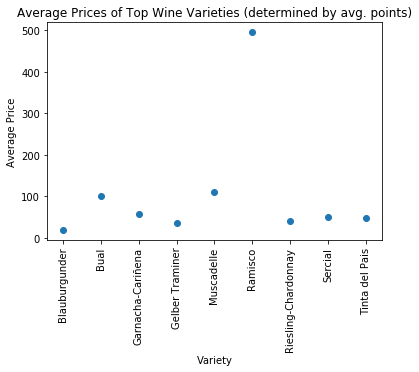

In [31]:
plt.scatter(top_variety.variety,top_variety.price)
plt.xticks(rotation=90)
plt.ylabel('Average Price')
plt.xlabel('Variety')
plt.title('Average Prices of Top Wine Varieties (determined by avg. points)')
plt.show()

### Where are the most wines coming from?

This dataset has the most number of wines from California, Washington, and Bordeaux.

In [32]:
province = df.loc[df['province'].isnull()==False]
by_province = pd.DataFrame(pd.pivot_table(province,columns='province',aggfunc='count').T)
by_province['province'] = by_province.index
by_province = by_province.reset_index(drop=True)
by_province = by_province[['province','Unnamed: 0']]
by_province.columns = ['province','count']
by_province.sort_values('count',ascending=False)[0:10].reset_index(drop=True)

,province,count
0,California,36247
1,Washington,8639
2,Bordeaux,5941
3,Tuscany,5897
4,Oregon,5373
5,Burgundy,3980
6,Northern Spain,3851
7,Piedmont,3729
8,Mendoza Province,3264
9,Veneto,2716


Roughly 28% of the wines in the dataset are from California.

In [33]:
print(36247/129971)

0.2788852897954159


### Exploring Year

The median year of the wines is 2011.

In [34]:
print(df.year.median())
print(df.year.mean())

2011.0
2010.6436240647085


More expensive wines started showing up closer to the year 2000.

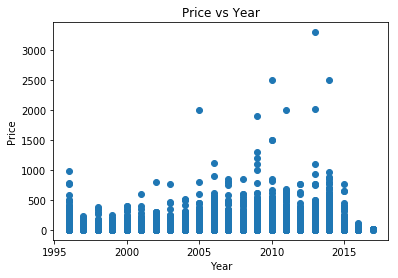

In [35]:
plt.scatter(df.year,df.price)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year')
plt.show()

There is a wide range of prices around the year 2000. We should also note that older wines are not represented in the dataset as much, so we cannot make conclusive statements about them.

Below we can see that there isn't much of a relationship between points and years.

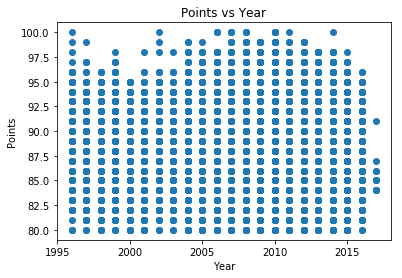

In [36]:
plt.scatter(df.year,df.points)
plt.xlabel('Year')
plt.ylabel('Points')
plt.title('Points vs Year')
plt.show()

# Modelling the data 
Our aim was to fit a model that could predict the points a wine got based on the factors in the dataset. 

## Preparing the data 
Before we started building out the model we wanted to ensure that our features were suitable to be fed into the model. Our data preparation process included transforming the price variable and encoding the categorical variables as dummy variables after reducing the number of levels. 

### Price 
We noticed in the exploratory analysis, that the relationship between price and points displayed some heteroskedacity and the distribution of price values was right-skewed. In order to combat this problem we applied a log transform to the price variable. After the transformation was applied we observed a linear trend between log price and points which further justifies our choice of a multiple linear regression model. 

In [37]:
df['logprice'] = np.log(df['price'])

### Country
The country variable initially represented 44 countries. We left the top 15 countries by frequency as they were and clubbed the rest into a separate category- 'other'. 

In [38]:
country_pts= df.groupby('country')['points'].agg(['count', 'mean', 'max', 'min' , 'median']).sort_values(by = 'count', ascending= False) 
country_pts.head(15)

,count,mean,max,min,median
country,,,,,
US,54504,88.563720,100,80,88.0
France,22093,88.845109,100,80,89.0
Italy,19540,88.562231,100,80,88.0
Spain,6645,87.288337,98,80,87.0
Portugal,5691,88.250220,100,80,88.0
Chile,4472,86.493515,95,80,86.0
Argentina,3800,86.710263,97,80,87.0
Austria,3345,90.101345,98,82,90.0
Australia,2329,88.580507,100,80,89.0


In [39]:
top_countries= country_pts.index[1:15] 
for i in range(0,129971): 
    if df['country'][i] in top_countries: 
        df.loc[i,'country']= df['country'][i]
    else: 
        df.loc[i,'country']= 'other'

### Variety
The variety variable initially represented 708 varieties. We left the top 100 varieties by frequency as they were and clubbed the rest into a separate category- 'other'.

In [40]:
var_pts=df.groupby('variety')['points'].agg(['count', 'mean', 'max', 'min' , 'median']).sort_values(by = 'count', ascending= False)
top_varieties= var_pts.index[1:50]
for i in range(0,129971): 
    if df['variety'][i] in top_varieties:
        df.loc[i,'variety']= df['variety'][i] 
    else: 
        df.loc[i,'variety']= 'other'

In [41]:
#### Export data 
#df.to_csv('wine1.csv', index=False, header=True)

### Preparing the data for Scikit- Learn

In [42]:
# Removing NA values
dat= df.loc[ ~(pd.isnull(df['country']) | pd.isnull(df['logprice']) | pd.isnull(df['year']) | pd.isnull(df['variety']))]

In [43]:
# Creating X, Y 
X= dat[['country', 'year', 'logprice', 'variety']]
y= dat['points']

In [44]:
# Converting to categories 
X.country= X.country.astype('category')
X.variety= X.variety.astype('category') 

/Users/arnavkumar/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [45]:
# Encoding categorical data: Creating dummy variables 
X1= pd.get_dummies(X, columns=["variety", "country"], prefix=["var", "country"])

## Feature Exploration
The aim of our feature exploration was to further the exploratory analysis and understand the relationships between the variables we were interested in to out response variable- price, in more detail. 

In [46]:
# Year
model = smf.ols('points ~ year', data = dat)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     537.4
Date:                Tue, 12 Jun 2018   Prob (F-statistic):          1.28e-118
Time:                        10:29:36   Log-Likelihood:            -2.9562e+05
No. Observations:              116838   AIC:                         5.912e+05
Df Residuals:                  116836   BIC:                         5.913e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.7462      4.883     -5.068      0.000     -34.317     -15.175
year           0.0563      0.002     23.182      0.000       0.052       0.061
==============================================================================
Omnibus:                      647.939   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.475
Skew:                           0.061   Prob(JB):                    8.49e-107
Kurtosis:                       2.708   Cond. No.                     1.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

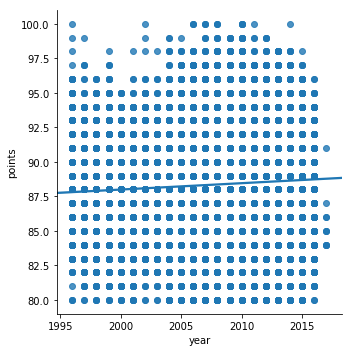

In [47]:
sns.lmplot( x= 'year' , y = 'points', data= df[df['year']> 0] )
plt.show()

The age of the wine evidently has very little influence on the points the wine recieves, and so will not be included in the final model. 

In [48]:
# Country 
model = smf.ols('points ~ country', data = dat)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     425.4
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        10:29:51   Log-Likelihood:            -2.9298e+05
No. Observations:              116838   AIC:                         5.860e+05
Df Residuals:                  116823   BIC:                         5.861e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  86.7345      0.049   1779.433      0.000      86.639      86.830
country[T.Australia]        1.8610      0.080     23.369      0.000       1.705       2.017
country[T.Austria]          3.4763      0.075     46.595      0.000       3.330       3.622
country[T.Canada]           2.6449      0.193     13.704      0.000       2.267       3.023
country[T.Chile]           -0.2283      0.066     -3.447      0.001      -0.358      -0.098
country[T.France]           2.0073      0.054     37.183      0.000       1.901       2.113
country[T.Germany]          3.1091      0.081     38.359      0.000       2.950       3.268
country[T.Greece]           0.6155      0.150      4.110      0.000       0.322       0.909
country[T.Israel]           1.7634      0.143     12.329      0.000       1.483       2.044
country[T.Italy]            1.9807      0.054     36.629      0.000       1.875       2.087
country[T.New Zealand]      1.5791      0.094     16.808      0.000       1.395       1.763
country[T.Portugal]         1.5959      0.065     24.404      0.000       1.468       1.724
country[T.South Africa]     1.1231      0.096     11.658      0.000       0.934       1.312
country[T.Spain]            0.5979      0.062      9.663      0.000       0.477       0.719
country[T.other]            1.8459      0.050     36.645      0.000       1.747       1.945
==============================================================================
Omnibus:                      673.543   Durbin-Watson:                   0.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.549
Skew:                           0.068   Prob(JB):                    1.37e-111
Kurtosis:                       2.706   Cond. No.                         28.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

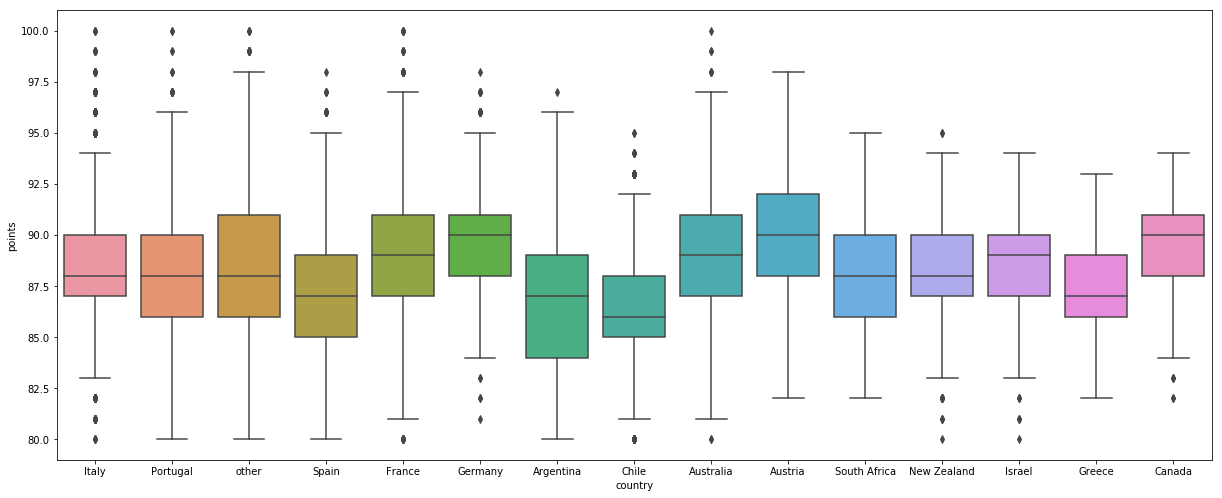

In [49]:
#Plotting boxplot for country
fig, ax = plt.subplots()
fig.set_size_inches(20.7, 8.27)
sns.boxplot(x="country", y="points", data=df) # boxplots
plt.show()

The country the wine was produced in plays a significant role in determining the points it recieves as per the model summary and boxplots displayed above, and so will be included in the model. 

In [50]:
#Variety
# For variety : 
model = smf.ols('points ~ variety', data = dat)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     167.7
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        10:29:53   Log-Likelihood:            -2.9192e+05
No. Observations:              116838   AIC:                         5.839e+05
Df Residuals:                  116788   BIC:                         5.844e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   89.3836      0.172    518.825      0.000      89.046      89.721
variety[T.Albariño]                         -1.6578      0.219     -7.570      0.000      -2.087      -1.229
variety[T.Barbera]                          -1.6307      0.209     -7.794      0.000      -2.041      -1.221
variety[T.Bordeaux-style Red Blend]         -0.5843      0.177     -3.302      0.001      -0.931      -0.237
variety[T.Bordeaux-style White Blend]       -1.4756      0.205     -7.188      0.000      -1.878      -1.073
variety[T.Cabernet Franc]                   -1.2295      0.191     -6.448      0.000      -1.603      -0.856
variety[T.Cabernet Sauvignon]               -0.7635      0.175     -4.364      0.000      -1.106      -0.421
variety[T.Carmenère]                        -2.7811      0.212    -13.111      0.000      -3.197      -2.365
variety[T.Champagne Blend]                   2.1468      0.223      9.608      0.000       1.709       2.585
variety[T.Chardonnay]                       -1.1002      0.175     -6.302      0.000      -1.442      -0.758
variety[T.Chenin Blanc]                     -0.9569      0.215     -4.442      0.000      -1.379      -0.535
variety[T.Corvina, Rondinella, Molinara]    -0.8876      0.217     -4.087      0.000      -1.313      -0.462
variety[T.Gamay]                            -1.1997      0.200     -5.991      0.000      -1.592      -0.807
variety[T.Garnacha]                         -3.4054      0.238    -14.293      0.000      -3.872      -2.938
variety[T.Gewürztraminer]                   -0.7666      0.197     -3.893      0.000      -1.153      -0.381
variety[T.Glera]                            -1.2007      0.252     -4.768      0.000      -1.694      -0.707
variety[T.Grenache]                         -0.3976      0.208     -1.914      0.056      -0.805       0.010
variety[T.Grüner Veltliner]                  0.6340      0.193      3.284      0.001       0.256       1.012
variety[T.Malbec]                           -1.4083      0.182     -7.749      0.000      -1.765      -1.052
variety[T.Melon]                            -0.8317      0.256     -3.246      0.001      -1.334      -0.330
variety[T.Merlot]                           -2.1678      0.180    -12.020      0.000      -2.521      -1.814
variety[T.Moscato]                          -2.7303      0.248    -11.026      0.000      -3.216      -2.245
variety[T.Nebbiolo]                          0.9476      0.183      5.185      0.000       0.589       1.306
variety[T.Nero d'Avola]                     -1.8744      0.237     -7.902      0.000      -2.339      -1.409
variety[T.Petite Sirah]                     -1.1854      0.202     -5.856      0.000      -1.582      -0.789
variety[T.Pinot Blanc]         

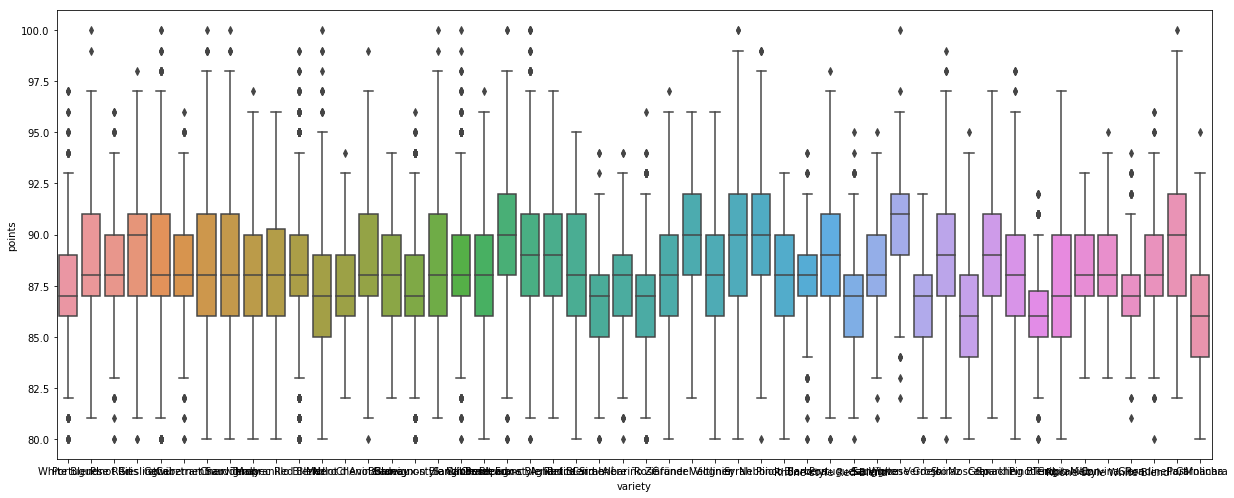

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(20.7, 8.27)
sns.boxplot(x="variety", y="points", data=df) # boxplots
plt.show()

The wine's variety plays a significant role in determining the points it recieves as per the model summary and boxplots displayed above, and so will be included in the model. 

In [52]:
##log price :
model = smf.ols('points ~  logprice', data = dat)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                 6.954e+04
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        10:29:54   Log-Likelihood:            -2.6861e+05
No. Observations:              116838   AIC:                         5.372e+05
Df Residuals:                  116836   BIC:                         5.372e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.0089      0.037   2163.601      0.000      78.937      79.081
logprice       2.8470      0.011    263.709      0.000       2.826       2.868
==============================================================================
Omnibus:                     2459.075   Durbin-Watson:                   0.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2624.017
Skew:                          -0.357   Prob(JB):                         0.00
Kurtosis:                       3.174   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

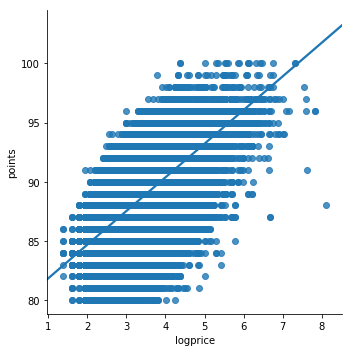

In [53]:
sns.lmplot( x= 'logprice' , y = 'points', data= df )
plt.show()

From the results and plot shown above it is evident that price plays the most significant role in determining the points the wine recieves. It explains around 37% of the variation in the price. It is likely the most important predictor of points and will be included in the model. 

In [54]:
## Model with all 4 predictors 
model = smf.ols('points ~ country + variety + year + logprice', data = dat)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     1308.
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        10:30:11   Log-Likelihood:            -2.6392e+05
No. Observations:              116838   AIC:                         5.280e+05
Df Residuals:                  116772   BIC:                         5.286e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 -112.4803      3.963    -28.385      0.000    -120.247    -104.714
country[T.Australia]                         1.1896      0.071     16.856      0.000       1.051       1.328
country[T.Austria]                           2.0983      0.071     29.579      0.000       1.959       2.237
country[T.Canada]                            1.0821      0.153      7.093      0.000       0.783       1.381
country[T.Chile]                             0.3661      0.057      6.453      0.000       0.255       0.477
country[T.France]                            0.8738      0.049     17.971      0.000       0.778       0.969
country[T.Germany]                           0.9615      0.075     12.778      0.000       0.814       1.109
country[T.Greece]                            0.6312      0.119      5.293      0.000       0.397       0.865
country[T.Israel]                            0.9616      0.114      8.450      0.000       0.739       1.185
country[T.Italy]                             0.8424      0.051     16.619      0.000       0.743       0.942
country[T.New Zealand]                       0.9769      0.078     12.571      0.000       0.825       1.129
country[T.Portugal]                          1.3042      0.079     16.444      0.000       1.149       1.460
country[T.South Africa]                      1.1785      0.080     14.782      0.000       1.022       1.335
country[T.Spain]                             0.4785      0.059      8.122      0.000       0.363       0.594
country[T.other]                             0.6031      0.045     13.416      0.000       0.515       0.691
variety[T.Albariño]                         -0.2299      0.176     -1.305      0.192      -0.575       0.116
variety[T.Barbera]                          -0.7461      0.165     -4.522      0.000      -1.070      -0.423
variety[T.Bordeaux-style Red Blend]         -0.6553      0.142     -4.611      0.000      -0.934      -0.377
variety[T.Bordeaux-style White Blend]       -0.4630      0.165     -2.806      0.005      -0.786      -0.140
variety[T.Cabernet Franc]                   -0.9224      0.152     -6.059      0.000      -1.221      -0.624
variety[T.Cabernet Sauvignon]               -0.7915      0.140     -5.652      0.000      -1.066      -0.517
variety[T.Carmenère]                        -0.5202      0.172     -3.021      0.003      -0.858      -0.183
variety[T.Champagne Blend]                   0.1934      0.179      1.080      0.280      -0.158       0.544
variety[T.Chardonnay]                       -0.5002      0.140     -3.579      0.000      -0.774      -0.226
variety[T.Chenin Blanc]                      0.2577      0.173      1.488      0.137      -0.082       0.597
variety[T.Corvina, Rondinella, 

## Choice of Model and Features
Based on our analysis we decided to use a multiple linear regresison model to predict points. We decided to go ahead with this model as we noticed a linear relationship between the predictors and response. We also found in our feature exploration shown above that a model containing these 3 explanatory features, explains about 40% of the variation in points. 
The features we will be including in the final model are logprice, variety and country. 

## Fitting model- Cross Validation and Predictions 

In [55]:
#Initiating model
model = linear_model.LinearRegression(fit_intercept = True)

In [56]:
# Excluding 
X2= X1.loc[:, X1.columns != 'year']

#### Cross validating to get R squared

In [57]:
cv_results = cross_val_score(model, X2, y, cv = 5) 
(cv_results)

array([0.40011485, 0.42031835, 0.38464043, 0.41313689, 0.41831254])

There is low variation between the different R-squared values between the different iterations. 

#### Splititng data into training and testing 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 1/3, random_state = 1)

In [59]:
# Fitting the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
# Predict on the test data: y_pred
y_pred = model.predict(X_test)

In [61]:
print("R^2 of the model when applied on the testing data: {}".format(model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2 of the model when applied on the testing data: 0.41795052976122854
Root Mean Squared Error: 2.31869750509787


#### Plotting residuals: 
he residuals are normally distributed indicating the valididty of the model


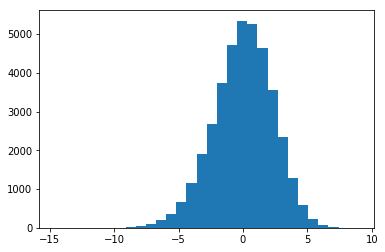

In [62]:
residuals = y_test - y_pred
plt.hist(residuals, bins= 30)
plt.show()

### Plotting predictions and the test  values

Text(0,0.5,'Frequency')

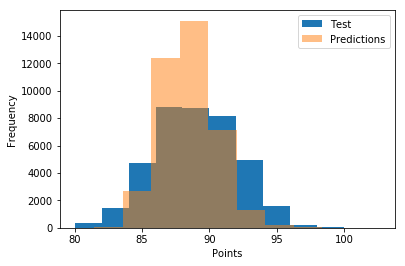

In [63]:
plt.hist(y_test, label= 'Test')
plt.hist(y_pred, alpha = 0.5, label= 'Predictions' )
plt.legend()
plt.xlabel('Points')
plt.ylabel('Frequency')

There is significant overlap between the predictions and the test values. The variation in the predictions is lower than the variation seen in the test values. 

## Conclusion 
Based on our analysis and predictive modelling we can conclude that even though factors such as the variety and county play a role in predicting the number of points a wine gets it is the price that is the best predictor. This indicates that the price can be considered the best stand in for quality, at least in the case of our dataset. 